In [108]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [109]:
cell_size = (1,1,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [125]:
resolution = 100
nfreq = 100

# 파장 범위 설정 (단위: μm)
lambda_min = 0.4
lambda_max = 0.7
# lambda_cen = 0.55

fmin = 1 / lambda_max
fmax = 1 / lambda_min
fcen = 0.5 * (fmin + fmax)

df = (fmax - fmin)

In [131]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=mp.Vector3(0,0)
)]

In [132]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [133]:
offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

<Axes: xlabel='X', ylabel='Y'>

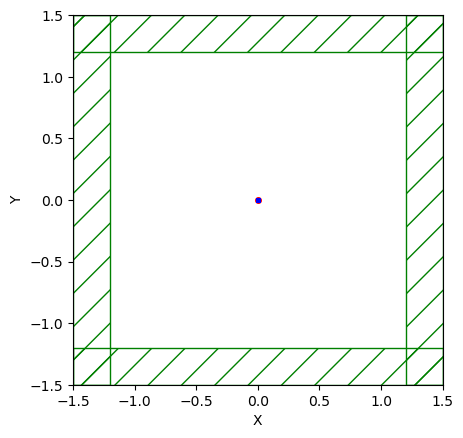

In [134]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000143051 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.0527291 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)
λ (μm)		net dipole power (W)
0.7000		5.227965e-06
0.6947		8.058979e-06
0.6896		1.220082e-05
0.6844		1.848243e-05
0.6794		2.754151e-05
0.6745		4.084941e-05
0.6696		5.972274e-05
0.6647		8.671815e-05
0.6600		1.243725e-04
0.6553		1.770327e-04
0.6507		2.493269e-04
0.6462		3.484615e-04
0.6417		4.824657e-04
0.6372		6.629186e-04
0.6329		9.030624e-04
0.6286		1.220807e-03
0.6243		1.636879e-03
0.6201		2.177774e-03
0.6160		2.874197e-03
0.6119		3.763412e-03
0.6079		4.888331e-03
0.6039		6.298452e-03
0.6000		8.050117e-03
0.5961		1.020496e-02
0.5923		1.283203e-02
0.5885		1.600243e-02
0.5848		1.979424e-02
0.5811		2.428194e-02
0.5775		2.954526e-02
0.5739		3.565193e-02
0.5704		4.267204e-02
0.5669		5.065276e-02
0.5634		5.963991e-02
0.5600		6.964375e-02
0.5

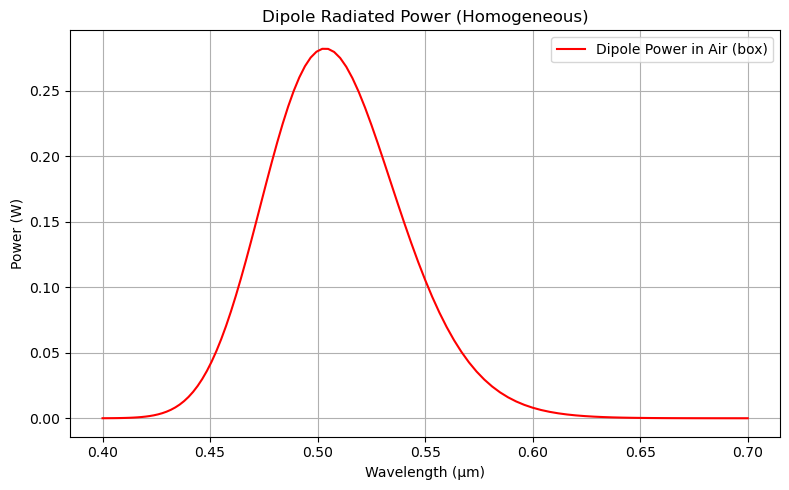

In [135]:
sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", color = 'red')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
# plt.xlim([0.4,0.7])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


run 1 finished at t = 100.0 (20000 timesteps)
λ (μm)		net dipole power (W)
-0.5440		3.642215e-02
-0.5668		2.811874e+00
-0.5915		3.771597e-02
-0.6186		1.312478e-01
-0.6482		3.130434e-01
-0.6808		-5.576216e-02
-0.7168		1.234315e-01
-0.7569		1.236338e-01
-0.8017		-3.032940e-02
-0.8522		1.091101e-01
-0.9094		5.378832e-02
-0.9749		-2.900143e-03
-1.0506		8.937609e-02
-1.1390		2.342837e-02
-1.2436		1.851699e-02
-1.3694		6.806716e-02
-1.5235		1.353147e-02
-1.7167		3.159222e-02
-1.9660		4.910788e-02
-2.3000		1.517640e-02
-2.7707		3.623825e-02
-3.4837		3.555630e-02
-4.6907		2.232439e-02
-7.1778		3.387886e-02
-15.2787		2.929327e-02
118.8000		2.940585e-02
12.1528		2.719217e-02
6.4040		3.106786e-02
4.3474		3.535978e-02
3.2907		1.906190e-02
2.6472		4.062620e-02
2.2142		3.478009e-02
1.9030		1.382622e-02
1.6684		5.665242e-02
1.4854		2.647125e-02
1.3385		1.657646e-02
1.2181		7.666136e-02
1.1175		9.705277e-03
1.0323		3.417116e-02
0.9592		9.704487e-02
0.8957		-1.440615e-02
0.8401		7.794142e-02
0.7910		1.

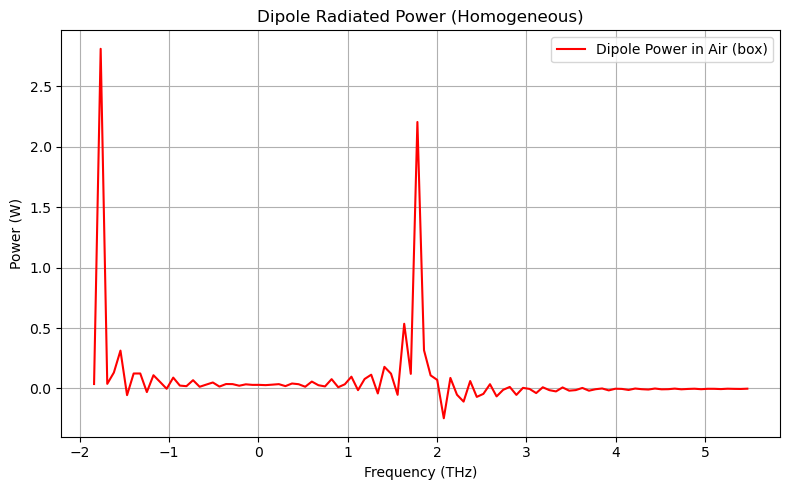

In [116]:
sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(flux_freqs, net_power, label="Dipole Power in Air (box)", color = 'red')
plt.xlabel("Frequency (THz)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
# plt.xlim([,2])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [117]:
import csv

# 저장할 파일 경로
filename = "dipole_power.csv"

# CSV로 저장
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Wavelength (μm)", "Power (W)"])  # 헤더
    for wl, power in zip(wavelengths, net_power):
        writer.writerow([wl, power])

print(f"CSV 파일 저장 완료: {filename}")

CSV 파일 저장 완료: dipole_power.csv


-----------
Initializing structure...
time for choose_chunkdivision = 0.000147104 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
time for set_epsilon = 0.051065 s
-----------
field decay(t = 50.005): 24265.405882879997 / 24265.405882879997 = 1.0
on time step 11997 (time=59.985), 0.000333437 s/step
field decay(t = 100.01): 2.976970678743163e-07 / 24265.405882879997 = 1.2268373721469497e-11
run 0 finished at t = 100.01 (20002 timesteps)


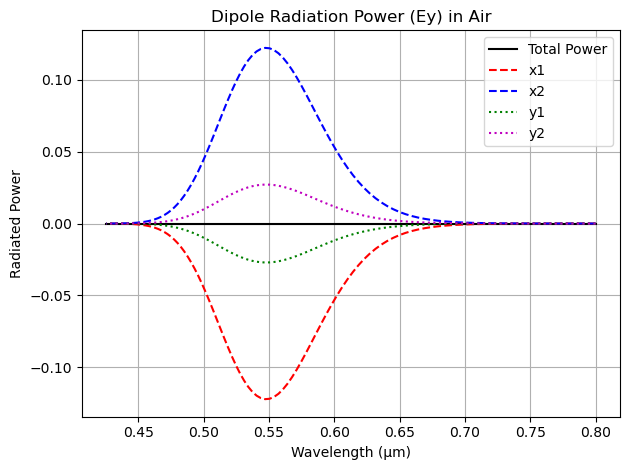

In [118]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 단위 설정 및 파라미터
# -----------------------------
resolution = 100  # 100 pixels/μm
cell_size = mp.Vector3(3, 3, 0)  # 충분히 큰 영역
pml_layers = [mp.PML(0.5)]  # 외곽 PML

# Dipole 파라미터
source_center = mp.Vector3(0, 0)
source_size = mp.Vector3(0, 0)
fcen = 1.8       # 중심 주파수 (1/μm) → λ ≈ 0.555 μm
df = 1.1         # 대역폭: 2.5 - 1.428
nfreq = 100      # 주파수 샘플 수

# -----------------------------
# 소스 정의 (Ey 방향 dipole)
# -----------------------------
sources = [mp.Source(
    mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=source_size
)]

# -----------------------------
# 시뮬레이션 정의
# -----------------------------
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=pml_layers,
    sources=sources,
    default_material=mp.Medium(epsilon=1.0)
)

# -----------------------------
# Flux 모니터 박스 설정
# dipole 중심 기준 박스 형태로 4개 면에 monitor 설치
# -----------------------------
flux_box_half_length = 0.5  # 박스 반 길이

x1 = sim.add_flux(fcen, df, nfreq,
                  mp.FluxRegion(center=mp.Vector3(-flux_box_half_length, 0),
                                size=mp.Vector3(0, 2 * flux_box_half_length),
                                direction=mp.X))

x2 = sim.add_flux(fcen, df, nfreq,
                  mp.FluxRegion(center=mp.Vector3(+flux_box_half_length, 0),
                                size=mp.Vector3(0, 2 * flux_box_half_length),
                                direction=mp.X))

y1 = sim.add_flux(fcen, df, nfreq,
                  mp.FluxRegion(center=mp.Vector3(0, -flux_box_half_length),
                                size=mp.Vector3(2 * flux_box_half_length, 0),
                                direction=mp.Y))

y2 = sim.add_flux(fcen, df, nfreq,
                  mp.FluxRegion(center=mp.Vector3(0, +flux_box_half_length),
                                size=mp.Vector3(2 * flux_box_half_length, 0),
                                direction=mp.Y))

# -----------------------------
# 시뮬레이션 실행
# -----------------------------
sim.run(until_after_sources=mp.stop_when_fields_decayed(
    50, mp.Ey, source_center, 1e-9))

# -----------------------------
# 각 면의 방사 파워 계산
# -----------------------------
flux_freqs = np.array(mp.get_flux_freqs(x1))
power_x1 = np.array(mp.get_fluxes(x1))
power_x2 = np.array(mp.get_fluxes(x2))
power_y1 = np.array(mp.get_fluxes(y1))
power_y2 = np.array(mp.get_fluxes(y2))

total_power = power_x1 + power_x2 + power_y1 + power_y2

# -----------------------------
# 플로팅
# -----------------------------
plt.figure(dpi=100)
plt.plot(1 / flux_freqs, total_power, label="Total Power", color='k')
plt.plot(1 / flux_freqs, power_x1, '--', label="x1", color='r')
plt.plot(1 / flux_freqs, power_x2, '--', label="x2", color='b')
plt.plot(1 / flux_freqs, power_y1, ':', label="y1", color='g')
plt.plot(1 / flux_freqs, power_y2, ':', label="y2", color='m')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Radiated Power")
plt.title("Dipole Radiation Power (Ey) in Air")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
